In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/2022%20Ukraine%20Russia%20War/russia_losses_equipment.csv", parse_dates=["date"])

In [3]:
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN


In [4]:
df.shape

(25, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   25 non-null     datetime64[ns]
 1   day                    25 non-null     int64         
 2   aircraft               25 non-null     int64         
 3   helicopter             25 non-null     int64         
 4   tank                   25 non-null     int64         
 5   APC                    25 non-null     int64         
 6   field artillery        25 non-null     int64         
 7   MRL                    25 non-null     int64         
 8   military auto          25 non-null     int64         
 9   fuel tank              25 non-null     int64         
 10  drone                  25 non-null     int64         
 11  naval ship             25 non-null     int64         
 12  anti-aircraft warfare  25 non-null     int64         
 13  special

In [6]:
df.isnull().sum()

date                      0
day                       0
aircraft                  0
helicopter                0
tank                      0
APC                       0
field artillery           0
MRL                       0
military auto             0
fuel tank                 0
drone                     0
naval ship                0
anti-aircraft warfare     0
special equipment        19
dtype: int64

In [7]:
df.fillna(0,inplace=True)
df.duplicated().sum()

0

In [8]:
df.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.000000,25.0,25.000000,25.000000
mean,14.000000,55.520000,69.320000,313.920000,1092.200000,130.080000,50.280000,530.920000,60.0,7.520000,2.6,25.080000,2.680000
std,7.359801,26.674145,35.504366,117.514864,276.919964,56.052743,22.552753,256.218156,0.0,5.930992,0.5,15.359362,4.896597
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.0,0.000000,2.0,0.000000,0.000000
25%,8.000000,30.000000,31.000000,217.000000,900.000000,90.000000,42.000000,374.000000,60.0,3.000000,2.0,11.000000,0.000000
50%,14.000000,49.000000,81.000000,317.000000,1070.000000,120.000000,56.000000,482.000000,60.0,7.000000,3.0,28.000000,0.000000
75%,20.000000,81.000000,95.000000,404.000000,1279.000000,150.000000,64.000000,640.000000,60.0,9.000000,3.0,36.000000,0.000000
max,26.000000,97.000000,121.000000,498.000000,1535.000000,240.000000,80.000000,969.000000,60.0,24.000000,3.0,45.000000,13.000000


In [9]:
df.corr()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment
day,1.000000,0.981409,0.981771,0.993773,0.990702,0.973751,0.933073,0.980309,NaN,0.891543,0.849208,0.986360,0.748053
aircraft,0.981409,1.000000,0.963469,0.970948,0.978514,0.963302,0.871487,0.965112,NaN,0.888420,0.803525,0.951103,0.785134
helicopter,0.981771,0.963469,1.000000,0.976668,0.971074,0.943859,0.904068,0.950779,NaN,0.874751,0.913503,0.977733,0.719382
tank,0.993773,0.970948,0.976668,1.000000,0.992519,0.964485,0.951699,0.976078,NaN,0.871202,0.838334,0.988372,0.721886
APC,0.990702,0.978514,0.971074,0.992519,1.000000,0.974490,0.936307,0.987729,NaN,0.883925,0.812810,0.976666,0.762667
field artillery,0.973751,0.963302,0.943859,0.964485,0.974490,1.000000,0.902437,0.993648,NaN,0.936105,0.754944,0.950800,0.861158
MRL,0.933073,0.871487,0.904068,0.951699,0.936307,0.902437,1.000000,0.927434,NaN,0.765163,0.790000,0.960058,0.589821
military auto,0.980309,0.965112,0.950779,0.976078,0.987729,0.993648,0.927434,1.000000,NaN,0.907570,0.768941,0.964635,0.828365
fuel tank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drone,0.891543,0.888420,0.874751,0.871202,0.883925,0.936105,0.765163,0.907570,NaN,1.000000,0.691284,0.832892,0.859627


In [13]:
df.columns

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment'],
      dtype='object')

In [15]:
df.sort_values(by='aircraft',ascending=False).head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment
24,2022-03-21,26,97,121,498,1535,240,80,969,60,24,3,45,13.0
23,2022-03-20,25,96,118,476,1487,230,74,947,60,21,3,44,12.0
22,2022-03-19,24,95,115,466,1470,213,72,914,60,17,3,44,11.0
21,2022-03-18,23,93,112,450,1448,205,72,879,60,12,3,43,11.0
20,2022-03-17,22,86,108,444,1435,201,72,864,60,11,3,43,10.0
19,2022-03-16,21,84,108,430,1375,190,70,819,60,11,3,43,10.0
18,2022-03-15,20,81,95,404,1279,150,64,640,60,9,3,36,0.0
17,2022-03-14,19,77,90,389,1249,150,64,617,60,8,3,34,0.0
16,2022-03-13,18,74,86,374,1226,140,62,600,60,7,3,34,0.0
15,2022-03-12,17,58,83,362,1205,135,62,585,60,7,3,33,0.0


In [16]:
df.sum().sort_values().sum()

58853.0

Text(0.5, 1.0, 'Destroyed Equepments')

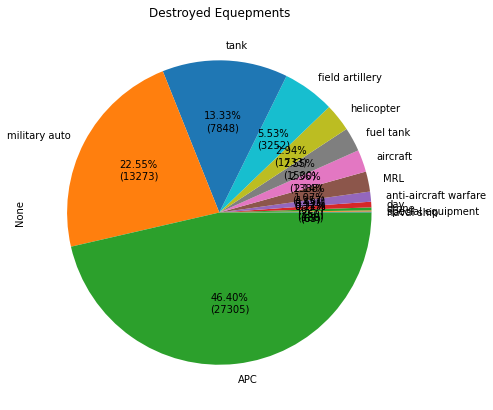

In [17]:
plt.figure(figsize=(7,7))
df.sum().sort_values().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df.sum().sort_values().sum())))
plt.title('Destroyed Equepments')

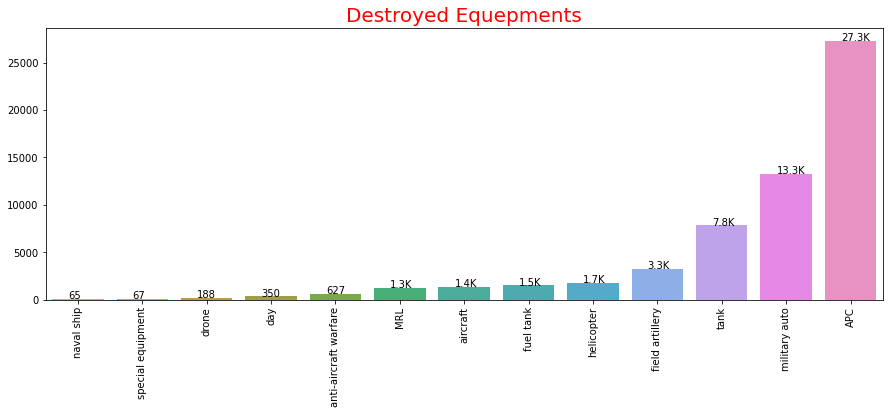

In [18]:
def num2MB(num):
    '''
        num: int, float
        it will return values like thousands(10K), Millions(10M),Billions(1B)
        '''
    if num < 1000: return int(num)
    if num >= 1000 and num < 1000000:return f'{float("%.1f" %(num/1000))}K'
    elif num>= 1000000 and num < 1000000000: return f'{float("%.1f" %(num/1000000))}M'
    else: return f'{float("%.1f" %(num/1000000000))}B'
    
def myBarPlot(data,data2=None,title=None,x_pos=0.25,y_pos=10,val_per=None):
    '''
    data: data
    data2: hue data
    title: str- title of graph
    x_pos: int/float - to adjust x-axis position of text
    y_pos=10: int/float - to adjust y-axis position of text
    val_per: default: None- nothing print
            'value': to print actual value on top
            'percent': to print in percent
            'val_per': to print both value and percent
    
    '''
    
    total_data = data.shape[0]
    
    ax = sns.barplot(data,data2)
    for i in ax.patches:
        height = i.get_height()   
        a = height
        x = i.get_x() 
        b = 0
        if val_per == 'value':
            b = num2MB(a)
        elif val_per == "percent":
            b = '{:.2f}%'.format((a/total_data)*100)
        elif val_per == 'val_per':
            b = '{}\n{:.2f}%'.format(num2MB(a),(a/total_data)*100)
        else:
            b = ''
 
        ax.text(x=x+x_pos,y=height+y_pos,s=b,rotation=None) 
    plt.title(title,fontdict={'fontsize':20,'color':'red'})
    plt.xticks(rotation=90)
plt.figure(figsize=(15,5))
myBarPlot(df.sum().sort_values().index,df.sum().sort_values().values,val_per='value', title='Destroyed Equepments')

In [19]:
df2 = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/2022%20Ukraine%20Russia%20War/russia_losses_personnel.csv',parse_dates=['date'])

In [20]:
df2.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [21]:
df2.shape

(25, 5)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        25 non-null     datetime64[ns]
 1   day         25 non-null     int64         
 2   personnel   25 non-null     int64         
 3   personnel*  25 non-null     object        
 4   POW         25 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ KB


In [23]:
df2.isnull().sum()

date          0
day           0
personnel     0
personnel*    0
POW           0
dtype: int64

In [24]:
df2.duplicated().sum()

0

<AxesSubplot:xlabel='personnel', ylabel='Density'>

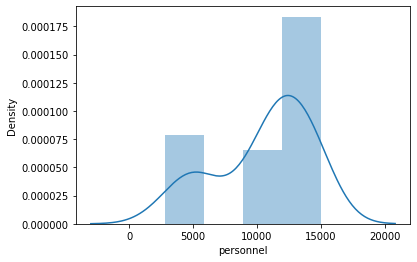

In [25]:
sns.distplot(df2['personnel'])

In [26]:
df2['personnel*'].value_counts()

about    19
more      6
Name: personnel*, dtype: int64

In [27]:
df2['POW'].value_counts()

389    6
405    5
0      4
200    4
216    1
232    1
259    1
284    1
360    1
371    1
Name: POW, dtype: int64

In [28]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df2['date'], y=df2['personnel'], mode='lines+markers',name=i,))

fig.show()

In [29]:
import plotly.express as px
fig = px.line(df2, x='date', y='personnel', color='personnel*', symbol="personnel*")
fig = px.line(df2, x='date', y='POW', color='POW', symbol="POW")

fig.show()

In [30]:
fig = px.line(df2, x='date', y='POW', color='POW', symbol="POW")

fig.show()

In [31]:
df2.sort_values(by='personnel',ascending=False).head(10)

,date,day,personnel,personnel*,POW
24,2022-03-21,26,15000,about,405
23,2022-03-20,25,14700,about,405
22,2022-03-19,24,14400,about,405
21,2022-03-18,23,14200,about,405
20,2022-03-17,22,14000,about,405
19,2022-03-16,21,13800,about,389
18,2022-03-15,20,13500,about,389
13,2022-03-10,15,12000,more,371
17,2022-03-14,19,12000,more,389
16,2022-03-13,18,12000,more,389


In [32]:
df2.sort_values(by='personnel').head(10)

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200
5,2022-03-02,7,5840,about,200
6,2022-03-03,8,9000,about,200
7,2022-03-04,9,9166,about,200
8,2022-03-05,10,10000,about,216
9,2022-03-06,11,11000,about,232


,date,day,personnel,personnel*,POW
24,2022-03-21,26,15000,about,405
23,2022-03-20,25,14700,about,405
22,2022-03-19,24,14400,about,405
21,2022-03-18,23,14200,about,405
20,2022-03-17,22,14000,about,405
19,2022-03-16,21,13800,about,389
18,2022-03-15,20,13500,about,389
13,2022-03-10,15,12000,more,371
17,2022-03-14,19,12000,more,389
16,2022-03-13,18,12000,more,389


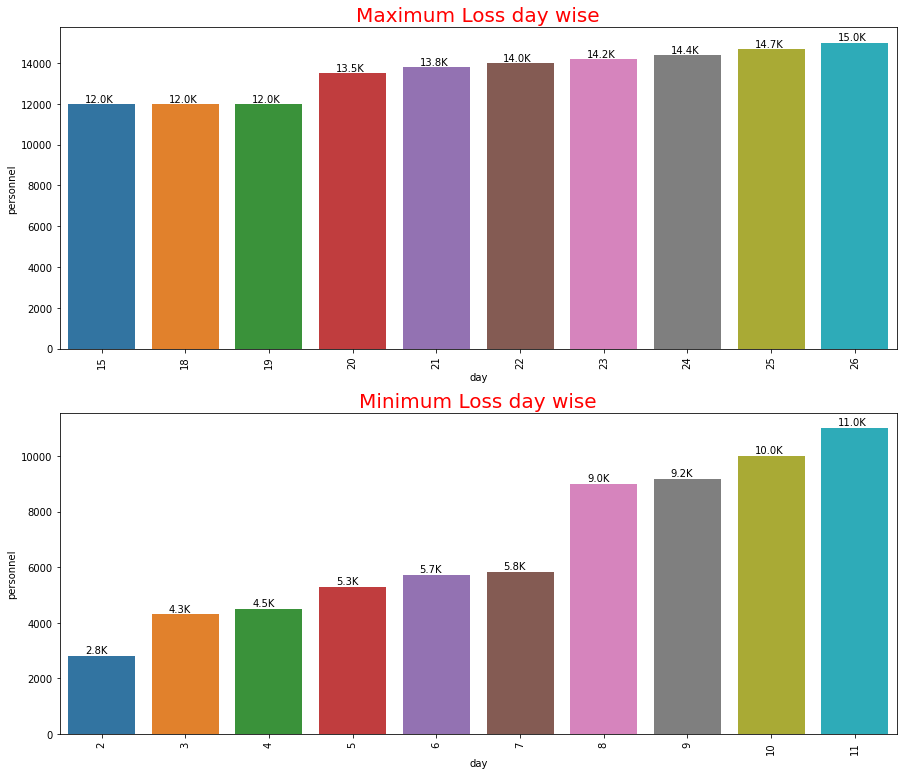

In [33]:
plt.figure(figsize=(15,13))
plt.subplot(211)
myBarPlot(df2.sort_values(by='personnel',ascending=False).head(10)['day'],df2.sort_values(by='personnel',ascending=False).head(10)['personnel'],val_per='value',x_pos=0.2,y_pos=100,title='Maximum Loss day wise')


plt.subplot(212)
myBarPlot(df2.sort_values(by='personnel').head(10)['day'],df2.sort_values(by='personnel').head(10)['personnel'],val_per='value',x_pos=0.2,y_pos=100,title='Minimum Loss day wise')

df2.sort_values(by='personnel',ascending=False).head(10)